In [20]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv(r"C:\Users\msurahman\Documents\projects\ML Project\data\raw\PakWheelsDataSet.csv")
df.shape

(76690, 10)

In [19]:
df.describe(include='all')

,Unnamed: 0,Make,Name,Transmission,Engine Type,Engine Capacity(CC),Mileage(kms),City,Year,Price
count,76690.000000,76690,76690,76690,76690,76687.000000,76690.000000,76690,76690.000000,7.669000e+04
unique,NaN,66,2845,2,5,NaN,NaN,326,NaN,NaN
top,NaN,Toyota,Corolla GLi 1.3 VVTi,Automatic,Petrol,NaN,NaN,Lahore,NaN,NaN
freq,NaN,29585,2954,44110,68890,NaN,NaN,15729,NaN,NaN
mean,38344.500000,NaN,NaN,NaN,NaN,1499.699806,87959.350411,NaN,2011.999374,3.023282e+06
std,22138.640409,NaN,NaN,NaN,NaN,723.373657,78759.138384,NaN,7.371098,4.303293e+06
min,0.000000,NaN,NaN,NaN,NaN,16.000000,1.000000,NaN,1940.000000,5.000000e+05
25%,19172.250000,NaN,NaN,NaN,NaN,1000.000000,39000.000000,NaN,2007.000000,1.215000e+06
50%,38344.500000,NaN,NaN,NaN,NaN,1300.000000,79892.000000,NaN,2014.000000,2.025000e+06
75%,57516.750000,NaN,NaN,NaN,NaN,1800.000000,119787.500000,NaN,2018.000000,3.200000e+06


In [15]:
df.dtypes

Unnamed: 0               int64
Make                    object
Name                    object
Transmission            object
Engine Type             object
Engine Capacity(CC)    float64
Mileage(kms)             int64
City                    object
Year                     int64
Price                  float64
dtype: object

In [17]:
df.head(2)

,Unnamed: 0,Make,Name,Transmission,Engine Type,Engine Capacity(CC),Mileage(kms),City,Year,Price
0,0,Honda,BR-V i-VTEC S,Automatic,Petrol,1500.0,41371,Karachi,2017,3150000.0
1,1,Toyota,Corolla Altis Automatic 1.6,Automatic,Petrol,1600.0,2460,Karachi,2021,3575000.0


In [22]:
missing= df.isnull().sum().sort_values(ascending=False)
missing[missing>0]

Engine Capacity(CC)    3
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76690 entries, 0 to 76689
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           76690 non-null  int64  
 1   Make                 76690 non-null  object 
 2   Name                 76690 non-null  object 
 3   Transmission         76690 non-null  object 
 4   Engine Type          76690 non-null  object 
 5   Engine Capacity(CC)  76687 non-null  float64
 6   Mileage(kms)         76690 non-null  int64  
 7   City                 76690 non-null  object 
 8   Year                 76690 non-null  int64  
 9   Price                76690 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.9+ MB


In [25]:
df.columns

Index(['Unnamed: 0', 'Make', 'Name', 'Transmission', 'Engine Type',
       'Engine Capacity(CC)', 'Mileage(kms)', 'City', 'Year', 'Price'],
      dtype='object')

In [26]:
important_cols=['Make', 'Name', 'Transmission', 'Engine Type',
       'Engine Capacity(CC)', 'City', 'Year', 'Price' ]
df.dropna(subset=important_cols,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76687 entries, 0 to 76689
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           76687 non-null  int64  
 1   Make                 76687 non-null  object 
 2   Name                 76687 non-null  object 
 3   Transmission         76687 non-null  object 
 4   Engine Type          76687 non-null  object 
 5   Engine Capacity(CC)  76687 non-null  float64
 6   Mileage(kms)         76687 non-null  int64  
 7   City                 76687 non-null  object 
 8   Year                 76687 non-null  int64  
 9   Price                76687 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 6.4+ MB


In [30]:
df['Price']=df['Price'].astype(str).str.replace(',','').str.extract('(\d+)',expand=False)
df['Price']=pd.to_numeric(df['Price'],errors='coerce')
df=df[df['Price']>100000]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76687 entries, 0 to 76689
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           76687 non-null  int64  
 1   Make                 76687 non-null  object 
 2   Name                 76687 non-null  object 
 3   Transmission         76687 non-null  object 
 4   Engine Type          76687 non-null  object 
 5   Engine Capacity(CC)  76687 non-null  float64
 6   Mileage(kms)         76687 non-null  int64  
 7   City                 76687 non-null  object 
 8   Year                 76687 non-null  int64  
 9   Price                76687 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 6.4+ MB


In [32]:
df['Engine Capacity(CC)']=df['Engine Capacity(CC)'].astype(str).str.extract('(\d+)',expand=False)
df['Engine Capacity(CC)']=pd.to_numeric(df['Engine Capacity(CC)'],errors='coerce')

In [33]:
df['Year']=pd.to_numeric(df['Year'],errors='coerce')
df=df[(df['Year']>1980) &(df['Year']<=2025)]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76535 entries, 0 to 76689
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           76535 non-null  int64 
 1   Make                 76535 non-null  object
 2   Name                 76535 non-null  object
 3   Transmission         76535 non-null  object
 4   Engine Type          76535 non-null  object
 5   Engine Capacity(CC)  76535 non-null  int64 
 6   Mileage(kms)         76535 non-null  int64 
 7   City                 76535 non-null  object
 8   Year                 76535 non-null  int64 
 9   Price                76535 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 6.4+ MB


In [35]:
df['City']= df['City'].str.strip().str.title()

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76535 entries, 0 to 76689
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           76535 non-null  int64 
 1   Make                 76535 non-null  object
 2   Name                 76535 non-null  object
 3   Transmission         76535 non-null  object
 4   Engine Type          76535 non-null  object
 5   Engine Capacity(CC)  76535 non-null  int64 
 6   Mileage(kms)         76535 non-null  int64 
 7   City                 76535 non-null  object
 8   Year                 76535 non-null  int64 
 9   Price                76535 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 6.4+ MB


C:\Users\msurahman\AppData\Local\Temp\ipykernel_15248\679430850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='Blues_d')


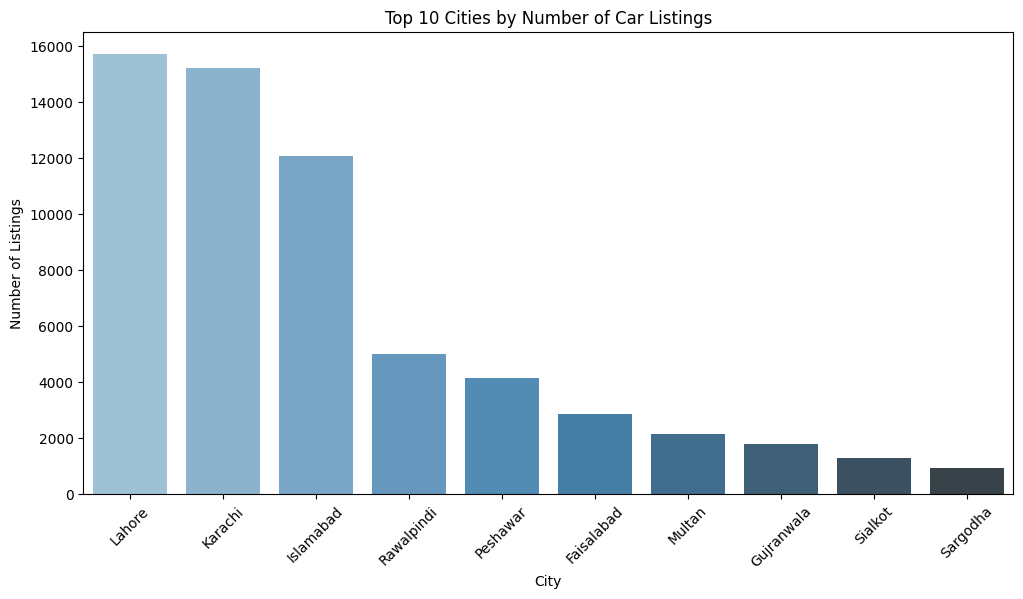

In [38]:
top_cities = df['City'].value_counts().head(10)

# 📊 Bar plot of car listings by city
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Blues_d')
plt.title('Top 10 Cities by Number of Car Listings')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

C:\Users\msurahman\AppData\Local\Temp\ipykernel_15248\676822371.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_city.index, y=avg_price_city.values, palette='Oranges')


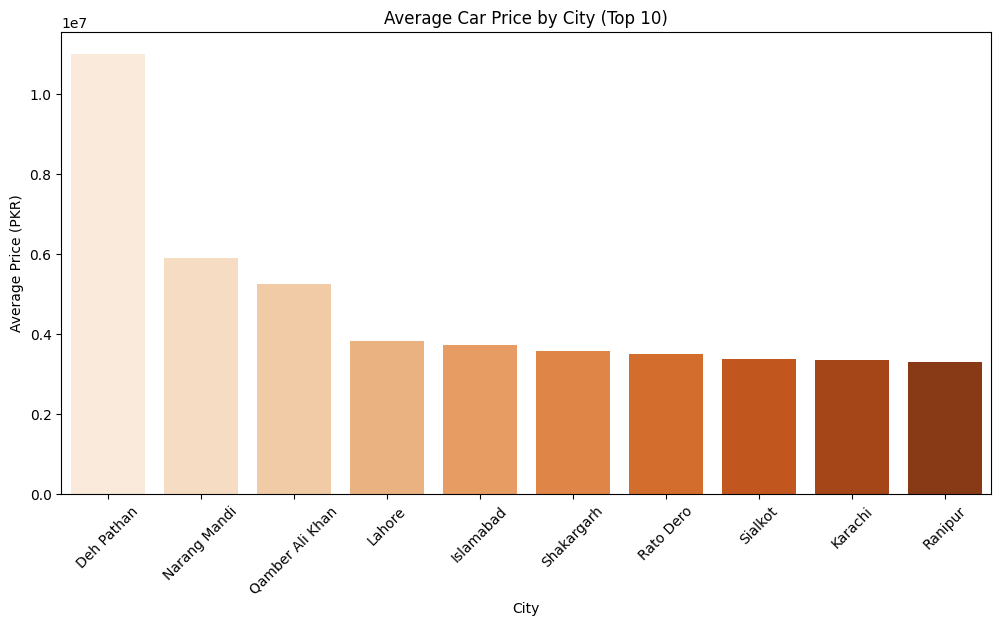

In [52]:
avg_price_city = df.groupby('City')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values, palette='Oranges')
plt.title('Average Car Price by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Average Price (PKR)')
plt.xticks(rotation=45)
plt.show()

C:\Users\msurahman\AppData\Local\Temp\ipykernel_15248\715762835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x='City', y='Price', palette='Set3')


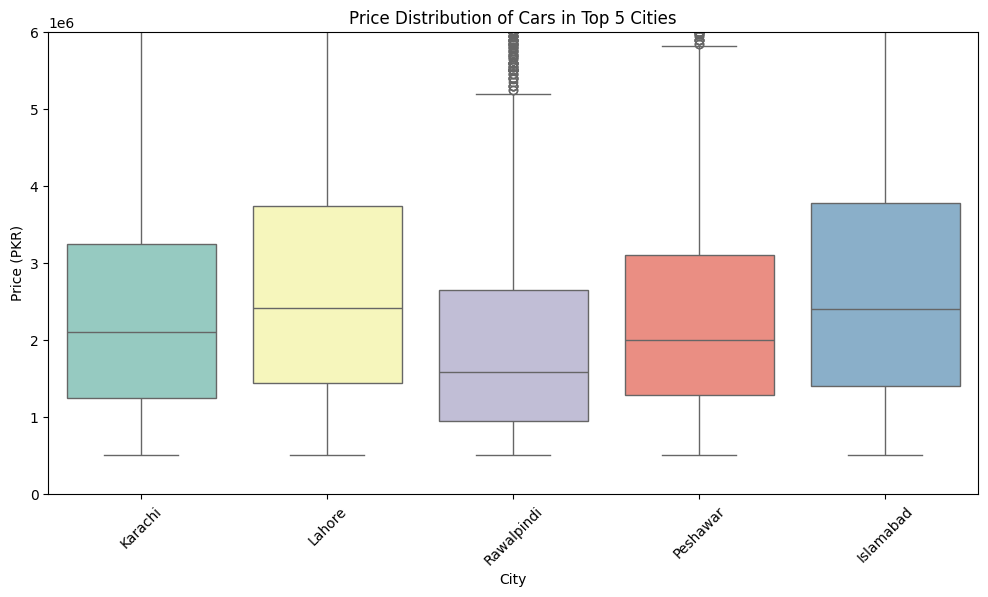

In [55]:
top_5_cities=df['City'].value_counts().head(5).index
subset_df=df[df['City'].isin(top_5_cities)]
plt.figure(figsize=(12,6))
sns.boxplot(data=subset_df, x='City', y='Price', palette='Set3')
plt.title('Price Distribution of Cars in Top 5 Cities')
plt.ylabel('Price (PKR)')
plt.xticks(rotation=45)
plt.ylim(0, 6000000)  # Limit y-axis to remove extreme outliers
plt.show()
